<a href="https://colab.research.google.com/github/outinletter/DataAnalysis/blob/main/%EC%9D%B4%EC%88%98%EC%95%88%EC%BB%B4%ED%93%A8%ED%84%B0%EC%97%B0%EA%B5%AC%EC%86%8C%2C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2C_6_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95(Gradient_Decent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 경사하강법(Gradient Decent)


### 볼록함수(Convex Function)
- 어떤 지점에서 시작하더라도 최적값(손실함수가 최소로하는 점)에 도달할 수 있음

- 1-D Convex Function
![](https://www.researchgate.net/profile/Miodrag_Mateljevic/publication/313821095/figure/fig5/AS:476113622310916@1490525741603/A-strictly-convex-function.png)
<br /><sub>출처: https://www.researchgate.net/figure/A-strictly-convex-function_fig5_313821095</sub>

- 2-D Convex Function  
![](https://www.researchgate.net/publication/275069197/figure/fig8/AS:324418665500689@1454358845613/Sphere-function-D-2.png)
<br /><sub>출처: https://www.researchgate.net/figure/Sphere-function-D-2_fig8_275069197</sub>

### 비볼록함수(Non-Convex Function)

- 비볼록 함수는 시작점 위치에 따라 다른 최적값에 도달할 수 있음.

- 1-D Non-Convex Function
![](https://image1.slideserve.com/2659452/example-of-non-convex-function-l.jpg)

<sub>출처: https://www.slideserve.com/betha/local-and-global-optima</sub>

- 2-D Non-Convex Function

![](https://upload.wikimedia.org/wikipedia/commons/e/e3/Non-Convex_Objective_Function.gif)

<sub>출처: https://commons.wikimedia.org/wiki/File:Non-Convex_Objective_Function.gif</sub>

### 경사하강법


#### 미분과 기울기
- 스칼라를 벡터로 미분한 것

## $\quad \frac{df(x)}{dx} = \lim_{\triangle x \to 0} \frac{f(x+\triangle x) - f(x)}{\triangle x}$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Gradient2.svg/2560px-Gradient2.svg.png)

<sub>출처: https://ko.wikipedia.org/wiki/%EA%B8%B0%EC%9A%B8%EA%B8%B0_(%EB%B2%A1%ED%84%B0)</sub>

  ## $\quad \triangledown f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2},\ ... \ , \frac{\partial f}{\partial x_N} \right)$
  - 변화가 있는 지점에서는 미분값이 존재하고, 변화가 없는 지점은 미분값이 0
  - 미분값이 클수록 변화량이 크다는 의미


#### 경사하강법의 과정

- 경사하강법은 한 스텝마다의 미분값에 따라 이동하는 방향을 결정

- $f(x)$의 값이 변하지 않을 때까지 반복

  ## $\qquad x_n = x_{n-1} - \eta \frac{\partial f}{\partial x}$
    
    - $\eta$ : 학습률(learning rate)

- 즉, **미분값이 0인 지점**을 찾는 방법  

![](https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND.)
<br /><sub>출처: https://www.kdnuggets.com/2018/06/intuitive-introduction-gradient-descent.html</sub>


- 2-D 경사하강법

![](https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-size_restricted.gif)
<br /><sub>출처: https://gfycat.com/ko/angryinconsequentialdiplodocus</sub>

#### 경사하강법 구현

$\quad f_1(x) = x^2$

In [ ]:
def f1(x):
    return x**2
    
def df_dx1(x):
    return 2*x

In [ ]:
df_dx1(10)

20

In [ ]:
def gradient_descent(f, df_dx, init_x, learning_rate=0.01, step_num=100):
    x=init_x
    x_log, y_log = [x], [f(x)]

    for i in range(step_num):
        grad = df_dx(x)
        x -= learning_rate * grad

        x_log.append(x)
        y_log.append(f(x))

    return x_log, y_log

In [ ]:
def gradient_descent_t(f, df_dx, init_x, learning_rate=0.01, step_num=3):
    x=init_x
    x_log, y_log = [x], [f(x)]

    for i in range(step_num):
        grad = df_dx(x)
        x -= learning_rate * grad

        x_log.append(x)
        y_log.append(f(x))

    return x_log, y_log

In [ ]:
gradient_descent_t(f1,df_dx1,5)

([5, 4.9, 4.8020000000000005, 4.70596],
 [25, 24.010000000000005, 23.059204000000005, 22.1460595216])

#### 경사하강법 시각화

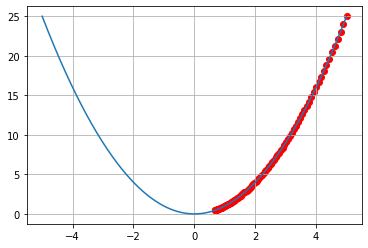

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

x_init =5
x_log, y_log = gradient_descent(f1, df_dx1, init_x= x_init)
plt.scatter(x_log, y_log, color ='red')

x=np.arange(-5,5,0.01)
plt.plot(x, f1(x))
plt.grid()
plt.show()

#### 비볼록 함수(Non-Convex Function)에서의 경사하강법

$\quad f_2(x) = 0.01x^4 - 0.3x^3 - 1.0x + 10.0$

In [ ]:
def f2(x):
    return 0.01*x**4 - 0.3*x**3 - 1.0*x + 10.0

def df_dx2(x):
    return 0.04*x**3 - 0.9*x**2 - 1.0

#### 비볼록함수 경사하강법 시각화

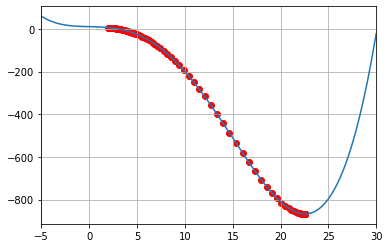

In [ ]:
x_init =2
x_log, y_log = gradient_descent(f2, df_dx2, init_x = x_init)

plt.scatter(x_log, y_log, color = 'red')
x=np.arange(-5,30, 0.01)
plt.plot(x, f2(x))
plt.xlim(-5, 30)
plt.grid()
plt.show()

### 전역 최적값 vs 지역 최적값
- 초기값이 어니냐에 따라 전체 함수의 최솟값이 될 수도 있고,  
  지역적으로 최솟값일 수 있음

![](https://www.kdnuggets.com/wp-content/uploads/function-max-global.jpg)
<br /><sub>출처: https://www.kdnuggets.com/2017/06/deep-learning-local-minimum.html</sub>

$\quad f_3(x) = x sin(x^2) + 1$ 그래프

In [ ]:
def f3(x):
    return x*np.sin(x**2) +1

def df_dx3(x):
    return np.sin(x**2) + x*np.cos(x**2)*2*x

#### 전역 최솟값 vs 지역 최솟값 시각화

Text(0.5, 2.467109795331882, 'x_init1 (1.5)')

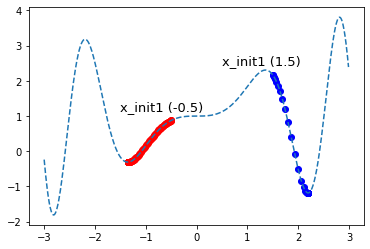

In [ ]:
x_init1 = -0.5
x_log1, y_log1 = gradient_descent(f3, df_dx3, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')

x_init2 = 1.5
x_log2, y_log2 = gradient_descent(f3,df_dx3, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')

x = np.arange(-3,3, 0.01)
plt.plot(x, f3(x), '--')

plt.scatter(x_init1, f3(x_init1), color='red')
plt.text(x_init1-1.0, f3(x_init1)+0.3, 'x_init1 ({})'.format(x_init1), fontsize=13)

plt.scatter(x_init2, f3(x_init2), color='blue')
plt.text(x_init2-1.0, f3(x_init2)+0.3, 'x_init1 ({})'.format(x_init2), fontsize=13)

#### 경사하강법 구현(2) 20:00분
- 경사하강을 진행하는 도중, 최솟값에 이르면 경사하강법을 종료하는 코드

$f_3(x) = x sin(x^2) + 1$ 그래프
- 각 시작점마다 경사하강법으로 내려가다가 최솟값으로 인지하는 부분에서 멈춤 

  step_num(반복횟수)만큼 다 돌지 않는 경우도 발생  

  하지만 주어진 범위 내에서의 최솟값은 첫번째 시작점일 때이다.

### 학습률(learning rate)
- 학습률 값은 적절히 지정해야 한다!
- 너무 크면 발산하고, 너무 작으면 학습이 잘 되지 않는다.
  
![](https://cdn-images-1.medium.com/freeze/max/1000/1*22oh44C5tUHbZ0yvIKWDFg.png)
<sub>출처: https://mc.ai/an-introduction-to-gradient-descent-algorithm/</sub>


#### 학습률별 경사하강법

### 안장점(Saddle Point)

- 기울기가 0이지만 극값이 되지 않음
- 경사하강법은 안장점에서 벗어나지 못함

![](https://e7.pngegg.com/pngimages/413/127/png-clipart-saddle-point-graph-of-a-function-gradient-descent-deep-learning-mathematics-mathematics-angle-furniture-thumbnail.png)
<br /><sub>출처: https://www.pngegg.com/en/png-czdxs</sub>

$f_2(x) = 0.01x^4 - 0.3x^3 - 1.0x + 10.0$ 그래프로 확인하기

- 첫번째 시작점  
  - count가 100, 즉 step_num(반복횟수)만큼 루프를 돌았음에도  
  손실함수의 값이 10 언저리에서 멈춤. 변화 X
  - 안장점 (Saddle Point)
  
  - 이는 학습률(learning rate)조절 또는 다른 초기값 설정을 통해 수정해야함

$f_3(x) = x sin(x^2) + 1$ 그래프에서 확인하기
